# <h1 style="text-align: center; text-decoration: underline">Tweets & Retweets by Time</h1>
<br>
<br>
><p style='font-size: large'>Similar to the previous notebook, we'll compare original tweets with retweets. Rather than do so on the basis of hashtags, we will explore the time aspects of the two sets. The datetime format of the Python pandas package will allow us to index our dataframes by aspects of time such as month, day, hour, etc.</p>

---
### Import packages & set options (notice the `calendar` package)

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
import matplotlib.pyplot as plt

In [4]:
import matplotlib.pyplot as mpl

In [5]:
from pylab import *

In [6]:
import seaborn as sns

In [7]:
%matplotlib inline

In [8]:
import calendar

In [9]:
plt.rcParams['figure.figsize'] = (15, 5)

In [10]:
df = pd.read_pickle('./data/a_HT_no_retweets.pkl')
print len(df)
df.head(1)

2187


,id,hash_select,tweet_id,inserted_date,truncated,language,possibly_sensitive,coordinates,retweeted_status,created_at_text,created_at,content,from_user_screen_name,from_user_id,from_user_followers_count,from_user_friends_count,from_user_listed_count,from_user_statuses_count,from_user_description,from_user_location,from_user_created_at,retweet_count,entities_urls,entities_urls_count,entities_hashtags,entities_hashtags_count,entities_mentions,entities_mentions_count,in_reply_to_screen_name,in_reply_to_status_id,source,entities_expanded_urls,json_output,entities_media_count,media_expanded_url,media_url,media_type,video_link,photo_link,twitpic
9,2555,%2523montanamoment,8.550000e+17,35:57.3,0,en,0.0,NaN,NaN,Fri Apr 21 04:21:17 +0000 2017,21:17.0,The night sky is a fascinating place especiall...,LeonKauffman,425125748.0,673,152,39,1616,"Hydrologist, photographer, fan of Drexel baske...","Condon, Montana, USA",Wed Nov 30 15:58:25 +0000 2011,4,NaN,0,MontanaMoment,1,NaN,0,NaN,NaN,"<a href=""https://about.twitter.com/products/tw...",NaN,"{u'contributors': None, u'truncated': False, u...",1.0,https://twitter.com/LeonKauffman/status/855275...,http://pbs.twimg.com/media/C96LaxcUQAEMOQl.jpg,photo,0,0,0


In [11]:
len (df.columns)

40

>### Now we'll change the UTC timestamp from the Twitter API to the pandas *datetime* format
<br>

In [12]:
df.dtypes[9:11]

created_at_text    object
created_at         object
dtype: object

In [13]:
# change the time variable from text to a usable format
df['created_at_text'] = pd.to_datetime(df['created_at_text'])

In [14]:
#confirmed: now python's datetime format
df.dtypes[9:11]

created_at_text    datetime64[ns]
created_at                 object
dtype: object

In [15]:
# index the df to the time variable
df = df.set_index(['created_at_text'])

In [16]:
df.head(1)

,id,hash_select,tweet_id,inserted_date,truncated,language,possibly_sensitive,coordinates,retweeted_status,created_at,content,from_user_screen_name,from_user_id,from_user_followers_count,from_user_friends_count,from_user_listed_count,from_user_statuses_count,from_user_description,from_user_location,from_user_created_at,retweet_count,entities_urls,entities_urls_count,entities_hashtags,entities_hashtags_count,entities_mentions,entities_mentions_count,in_reply_to_screen_name,in_reply_to_status_id,source,entities_expanded_urls,json_output,entities_media_count,media_expanded_url,media_url,media_type,video_link,photo_link,twitpic
created_at_text,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-04-21 04:21:17,2555,%2523montanamoment,8.550000e+17,35:57.3,0,en,0.0,NaN,NaN,21:17.0,The night sky is a fascinating place especiall...,LeonKauffman,425125748.0,673,152,39,1616,"Hydrologist, photographer, fan of Drexel baske...","Condon, Montana, USA",Wed Nov 30 15:58:25 +0000 2011,4,NaN,0,MontanaMoment,1,NaN,0,NaN,NaN,"<a href=""https://about.twitter.com/products/tw...",NaN,"{u'contributors': None, u'truncated': False, u...",1.0,https://twitter.com/LeonKauffman/status/855275...,http://pbs.twimg.com/media/C96LaxcUQAEMOQl.jpg,photo,0,0,0


In [17]:
# a function to apply to the groupby command below. f(x) counts the number of tweets based on the content variable
# when added to groupby, it aggregates tweets based on the time variable
def f(x):
    return Series(dict(num_tweets = x['content'].count(),
                      ))

In [18]:
day_cnt = df.groupby(df.index.date).apply(f)

In [19]:
# the HT data contains tweets containing the hashtag 'montanaMoment' (not case sensitive) from 12/24/16 ( table 1)
# to 04/17/17 ( table 2)

print 'table 1'
print len(day_cnt)
day_cnt.head()

table 1
105


,num_tweets
2016-12-24,17
2016-12-25,11
2016-12-26,23
2016-12-27,23
2016-12-28,16


In [20]:
day_cnt.index.name = 'date'

In [21]:
print 'table 2'
day_cnt.tail()

table 2


,num_tweets
date,
2017-04-17,16
2017-04-18,21
2017-04-19,14
2017-04-20,23
2017-04-21,3


>## Original Tweets by Day

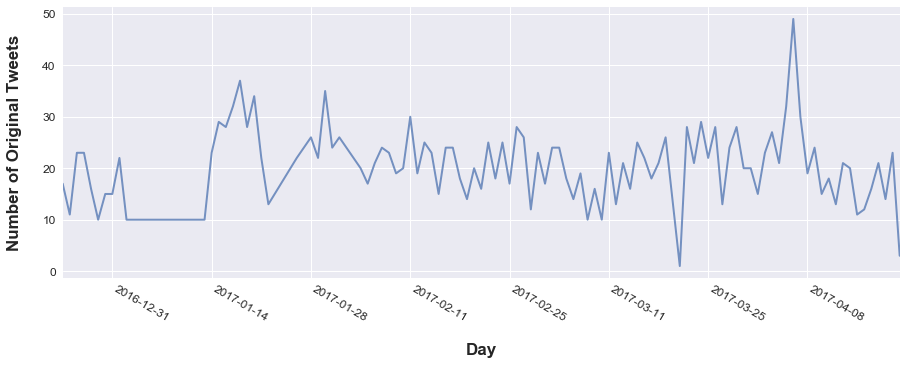

In [22]:
day_plot = day_cnt['num_tweets'].plot(kind='line', lw=2, alpha=0.75, legend=True, x_compat=True)

day_plot.set_xlabel('Day', weight='bold', labelpad=20, fontsize=17)
day_plot.set_ylabel('Number of Original Tweets', weight='bold', labelpad=20, fontsize=17)

xticks(fontsize = 12, rotation = -30, ha ="left")
yticks(fontsize = 12)                              


day_plot.legend_ = None
day_plot.tick_params(axis='x', pad=5)


savefig('graph_HT_time_NOREtweets_day.png', bbox_inches='tight', dpi=300, format='png')

In [23]:
# day_cnt.to_csv('HT_num_tweets_time_day.csv')

>## Original Tweets by Week

In [24]:
# use the f(x) we wrote earlier to aggregate tweets based on the day of the week they were sent
wk_cnt = df.groupby(df.index.weekday).apply(f)

In [25]:
# 0 = Mon, 6 = sunday

print len(wk_cnt)
wk_cnt

7


,num_tweets
0,294
1,274
2,315
3,334
4,328
5,323
6,319


In [26]:
# create list of days, assign it to new 'days' variable
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
wk_cnt['days'] = days

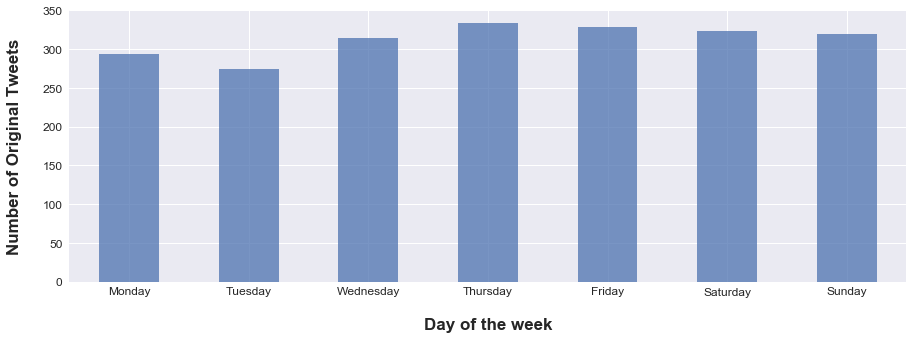

In [27]:
wk_plot = wk_cnt['num_tweets'].plot(kind='bar', alpha=0.75, legend=True)
xticks(np.arange(7), wk_cnt['days'], fontsize = 12, rotation = 0)
wk_plot.set_xlabel('Day of the week', weight='bold', labelpad=20, fontsize=17)

wk_plot.set_ylabel('Number of Original Tweets', weight='bold', labelpad=20, fontsize=17)


yticks(fontsize = 12)                              


wk_plot.legend_ = None
wk_plot.tick_params(axis='x', pad=5)

# savefig('graph_HT_time_NOREtweets_week_bar.png', bbox_inches='tight', dpi=300, format='png')

>## Original Tweets by Hour

In [28]:
# group the df by hour a tweet is sent
hr_cnt = df.groupby(df.index.hour).apply(f)
print len(hr_cnt)
hr_cnt

24


,num_tweets
0,98
1,124
2,127
3,143
4,103
5,77
6,47
7,29
8,39
9,21


In [29]:
len(df)

2187

<br>
>### Since the timestamp from the Twitter API is in UTC, we'll shift the labels on the graph to represent local Montana time (-6 hours)
<br>

In [30]:
hours = ['18', '19', '20', '21', '22', '23', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17']
hr_cnt['hours'] = hours

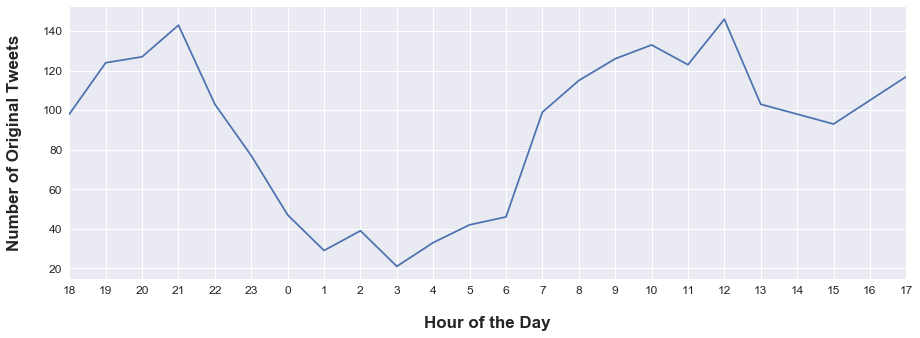

In [31]:
hr_plot = hr_cnt['num_tweets'].plot(kind='line')
xticks(np.arange(24), hr_cnt['hours'], rotation = 0,fontsize = 9)

hr_plot.set_xlabel('Hour of the Day', weight='bold', labelpad=20, fontsize=17) 
hr_plot.set_ylabel('Number of Original Tweets', weight='bold', labelpad=20, fontsize=17)

xticks(fontsize = 12)                          
yticks(fontsize = 12) 

day_plot.tick_params(axis='x', pad=5)   
day_plot.legend_ = None                           


# savefig('graph_HT_time_NOREtweets_hour_line.png', bbox_inches='tight', dpi=300, format='png')

<br>
<br>
>## Original Tweets by month

>Since we don't have a full year to analyze, let's make sure there aren't any drastic volume changes from month to month.


In [32]:
# aggregates tweet count by month
month_cnt = df.groupby(df.index.month).apply(f)

In [33]:
# as expected, the incomplete months have much less, particularly Dec, which only has 8 days

print len(month_cnt)
month_cnt

5


,num_tweets
1,441
2,595
3,594
4,427
12,130


In [34]:
# manually reindex the month_cnt DataFrame to graph in chronological order
month_cnt2 = month_cnt.reindex([12,1,2,3,4])
month_cnt2

,num_tweets
12,130
1,441
2,595
3,594
4,427


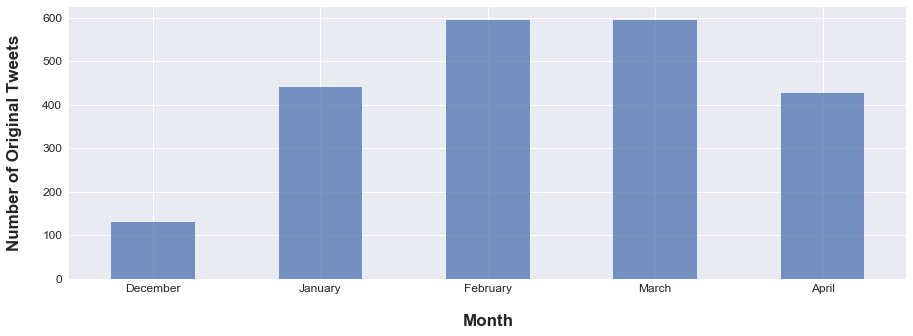

In [35]:
month_plot = month_cnt2['num_tweets'].plot(kind='bar', alpha=0.75)
months = ['December', 'January', 'February', 'March', 'April']
xticks(np.arange(5), months, rotation = 0,fontsize = 9)

month_plot.set_xlabel('Month', weight='bold', labelpad=20, fontsize=17) 
month_plot.set_ylabel('Number of Original Tweets', weight='bold', labelpad=20, fontsize=17)

xticks(fontsize = 12)                          
yticks(fontsize = 12) 

month_plot.tick_params(axis='x', pad=5)   
month_plot.legend_ = None                           

#savefig('graph_HT_time_NOREtweets_month_bar.png', bbox_inches='tight', dpi=300, format='png')

<br>
<br>
<br>
<br>
<br>
---
## Now, we'll do the same thing, but for retweets. 
><p style='font-size: large'>This part isn't necessary, since this can be achieved by changing the dataframe at the top of this script to a retweets-only version. However, to make the analysis more accessible, the retweets portion is replicated below</p>

### We already have the packages we need, so let's just change our df variable to a retweets-only version & modify the timestamp

In [36]:
df = pd.read_pickle('./data/a_HT_retweetsONLY.pkl')
print len(df), 'retweets'
df.head(1)

5482 retweets


,id,hash_select,tweet_id,inserted_date,truncated,language,possibly_sensitive,coordinates,retweeted_status,created_at_text,created_at,content,from_user_screen_name,from_user_id,from_user_followers_count,from_user_friends_count,from_user_listed_count,from_user_statuses_count,from_user_description,from_user_location,from_user_created_at,retweet_count,entities_urls,entities_urls_count,entities_hashtags,entities_hashtags_count,entities_mentions,entities_mentions_count,in_reply_to_screen_name,in_reply_to_status_id,source,entities_expanded_urls,json_output,entities_media_count,media_expanded_url,media_url,media_type,video_link,photo_link,twitpic
0,2546,%2523montanamoment,8.550000e+17,35:55.8,0,en,NaN,NaN,THIS IS A RETWEET --> DOUBLE-CHECK JSON,Fri Apr 21 05:32:02 +0000 2017,D,RT @LeonKauffman: The night sky is a fascinati...,J_M1812,245570167.0,261,691,10,2061,"Writer, editor, aspiring photographer. Native ...",Montana,Tue Feb 01 00:22:51 +0000 2011,4,NaN,0,MontanaMoment,1,LeonKauffman,1,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,"{u'contributors': None, u'truncated': False, u...",NaN,NaN,NaN,NaN,0,0,0


In [37]:
df.dtypes[9:11]

created_at_text    object
created_at         object
dtype: object

In [38]:
# change the time variable from text to a usable format
df['created_at_text'] = pd.to_datetime(df['created_at_text'])

In [39]:
#confirmed: now python's datetime format
df.dtypes[9:11]

created_at_text    datetime64[ns]
created_at                 object
dtype: object

<br>
>### Now, let's set the index to the day a retweet was created and plot it

In [40]:
# index the df to the time variable
df = df.set_index(['created_at_text'])

In [41]:
df.head(1)

,id,hash_select,tweet_id,inserted_date,truncated,language,possibly_sensitive,coordinates,retweeted_status,created_at,content,from_user_screen_name,from_user_id,from_user_followers_count,from_user_friends_count,from_user_listed_count,from_user_statuses_count,from_user_description,from_user_location,from_user_created_at,retweet_count,entities_urls,entities_urls_count,entities_hashtags,entities_hashtags_count,entities_mentions,entities_mentions_count,in_reply_to_screen_name,in_reply_to_status_id,source,entities_expanded_urls,json_output,entities_media_count,media_expanded_url,media_url,media_type,video_link,photo_link,twitpic
created_at_text,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-04-21 05:32:02,2546,%2523montanamoment,8.550000e+17,35:55.8,0,en,NaN,NaN,THIS IS A RETWEET --> DOUBLE-CHECK JSON,D,RT @LeonKauffman: The night sky is a fascinati...,J_M1812,245570167.0,261,691,10,2061,"Writer, editor, aspiring photographer. Native ...",Montana,Tue Feb 01 00:22:51 +0000 2011,4,NaN,0,MontanaMoment,1,LeonKauffman,1,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,"{u'contributors': None, u'truncated': False, u...",NaN,NaN,NaN,NaN,0,0,0


In [42]:
# a function to apply to the groupby command below. f(x) counts the number of tweets based on the content variable
# when added to groupby, it aggregates tweets based on the time variable
def f(x):
    return Series(dict(num_tweets = x['content'].count(),
                      ))

In [43]:
day_cnt = df.groupby(df.index.date).apply(f)

In [44]:
day_cnt.index.name = 'date'

In [45]:
# the HT data contains tweets containing the hashtag 'montanaMoment' (not case sensitive) from 12/24/16 to 04/17/17
print len(day_cnt), 'days'
day_cnt.head()

105 days


,num_tweets
date,
2016-12-24,22
2016-12-25,25
2016-12-26,76
2016-12-27,36
2016-12-28,94


In [46]:
day_cnt.tail()

,num_tweets
date,
2017-04-17,43
2017-04-18,53
2017-04-19,38
2017-04-20,49
2017-04-21,18


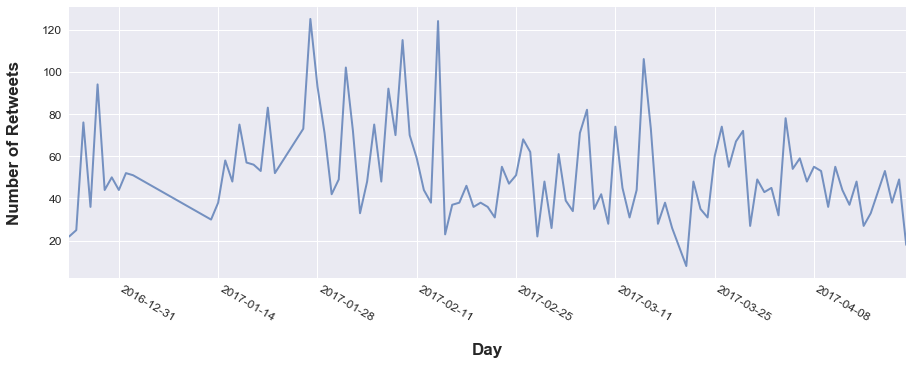

In [47]:
day_plot = day_cnt['num_tweets'].plot(kind='line', lw=2, alpha=0.75, legend=True, x_compat=True)

day_plot.set_xlabel('Day', weight='bold', labelpad=20, fontsize=17)
day_plot.set_ylabel('Number of Retweets', weight='bold', labelpad=20, fontsize=17)

xticks(fontsize = 12, rotation = -30, ha ="left")
yticks(fontsize = 12)                              


day_plot.legend_ = None
day_plot.tick_params(axis='x', pad=5)


#savefig('graph_HT_time_RETweets_day.png', bbox_inches='tight', dpi=300, format='png')

In [48]:
# day_cnt.to_csv('HT_num_tweets_time_day.csv')

<br>
<br>
>## Retweets by (day-of-) week

In [49]:
# use the f(x) we wrote earlier to aggregate tweets based on the day of the week they were sent
wk_cnt = df.groupby(df.index.weekday).apply(f)

In [50]:
# 0 = Mon, 6 = sunday

print len(wk_cnt)
wk_cnt

7


,num_tweets
0,671
1,821
2,822
3,800
4,757
5,820
6,791


In [51]:
# create list of days, assign it to new 'days' variable
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
wk_cnt['days'] = days

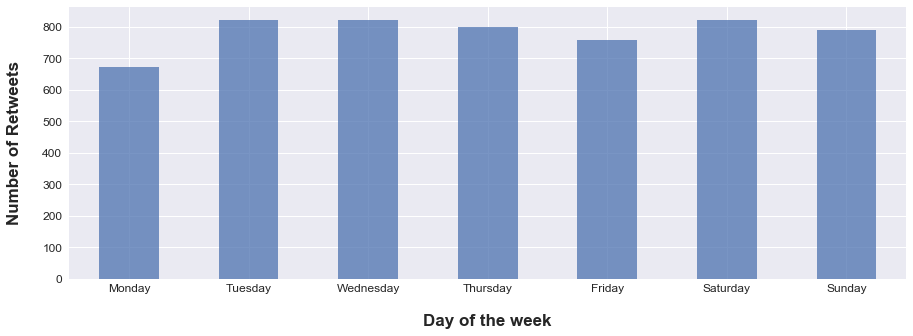

In [52]:
wk_plot = wk_cnt['num_tweets'].plot(kind='bar', alpha=0.75, legend=True)
xticks(np.arange(7), wk_cnt['days'], fontsize = 12, rotation = 0)
wk_plot.set_xlabel('Day of the week', weight='bold', labelpad=20, fontsize=17)

wk_plot.set_ylabel('Number of Retweets', weight='bold', labelpad=20, fontsize=17)


yticks(fontsize = 12)                              


wk_plot.legend_ = None
wk_plot.tick_params(axis='x', pad=5)

#savefig('graph_HT_time_REtweetsONLY_week_bar.png', bbox_inches='tight', dpi=300, format='png')

<br>
<br>
>## Retweets by hour

In [53]:
# group the df by hour a tweet is sent
hr_cnt = df.groupby(df.index.hour).apply(f)
print len(hr_cnt)
hr_cnt

24


,num_tweets
0,219
1,264
2,234
3,273
4,306
5,226
6,135
7,106
8,75
9,53


In [54]:
hours = ['18', '19', '20', '21', '22', '23', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17']
hr_cnt['hours'] = hours

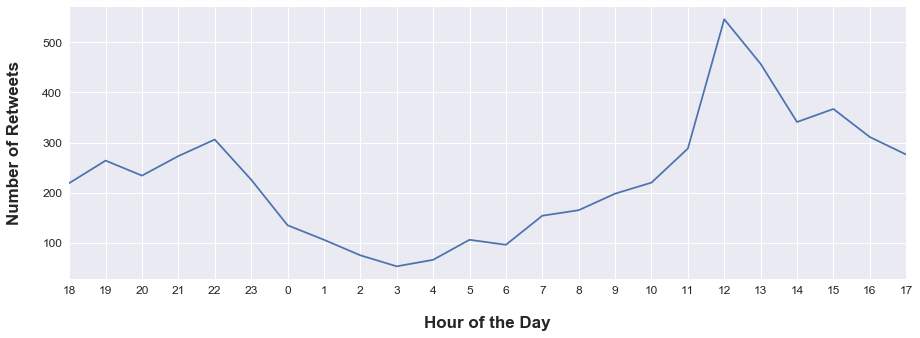

In [55]:
hr_plot = hr_cnt['num_tweets'].plot(kind='line')
xticks(np.arange(24), hr_cnt['hours'], rotation = 0,fontsize = 9)

hr_plot.set_xlabel('Hour of the Day', weight='bold', labelpad=20, fontsize=17) 
hr_plot.set_ylabel('Number of Retweets', weight='bold', labelpad=20, fontsize=17)

xticks(fontsize = 12)                          
yticks(fontsize = 12) 

day_plot.tick_params(axis='x', pad=5)   
day_plot.legend_ = None                           

#savefig('graph_HT_time_tweets_hour_line_RETWEETSonly.png', bbox_inches='tight', dpi=300, format='png')

<br>
<br>
>## Retweets by Month

In [56]:
# aggregates tweet count by month
month_cnt = df.groupby(df.index.month).apply(f)

In [57]:
print len(month_cnt)
month_cnt

5


,num_tweets
1,1106
2,1580
3,1457
4,948
12,391


In [58]:
# manually reindex the month_cnt DataFrame to graph in chronological order
month_cnt2 = month_cnt.reindex([12,1,2,3,4])
month_cnt2

,num_tweets
12,391
1,1106
2,1580
3,1457
4,948


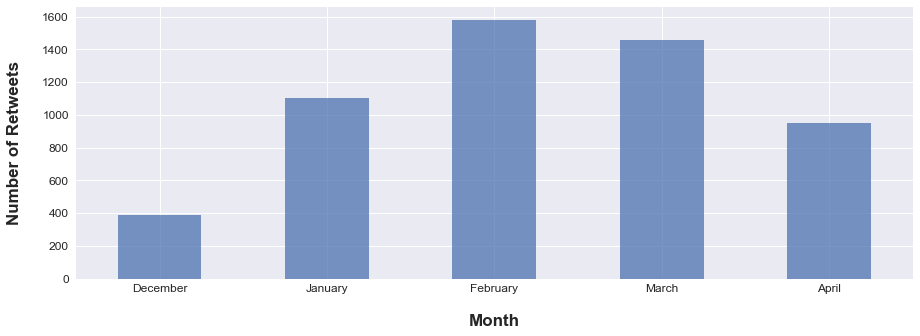

In [59]:
month_plot = month_cnt2['num_tweets'].plot(kind='bar', alpha=0.75)
months = ['December', 'January', 'February', 'March', 'April']
xticks(np.arange(5), months, rotation = 0,fontsize = 9)

month_plot.set_xlabel('Month', weight='bold', labelpad=20, fontsize=17) 
month_plot.set_ylabel('Number of Retweets', weight='bold', labelpad=20, fontsize=17)

xticks(fontsize = 12)                          
yticks(fontsize = 12) 

month_plot.tick_params(axis='x', pad=5)   
month_plot.legend_ = None                           

# savefig('graph_HT_time_RETweets_month_bar.png', bbox_inches='tight', dpi=300, format='png')

---
<br>
## That's all for now. Next, we'll create the variables we'll use in the regression analyses
<br>
<br>